In [2]:
import numpy as np
from scipy.stats import maxwell
import matplotlib.pyplot as plt
from scipy import stats 

$$E_{peak} = k_bT$$
$$v_{max} = \sqrt{E_{peak} / m}$$

In [3]:
k_b = 1.380649e-23 # J/K
T = 20 # K 
m_n = 1.67492749804e-27 # kg
h = 6.62607015e-34 # J / Hz
a = np.sqrt(k_b * T / m_n)
a

406.03047656170486

In [4]:
max_v = np.sqrt(2) * a
max_v

574.2138066903741

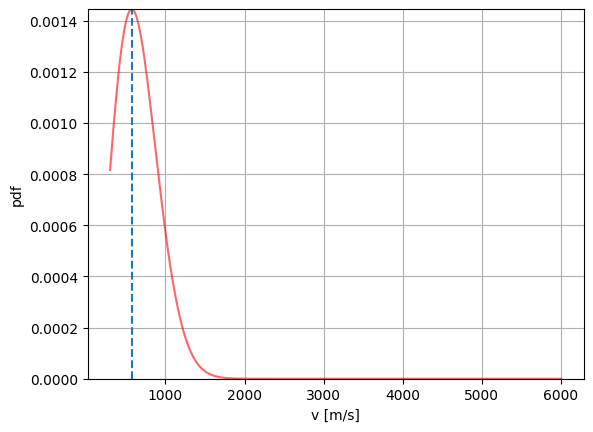

In [5]:
v = np.linspace(300,6000,10000)
pdf_v = maxwell.pdf(v, scale=a)
min_y = np.min(pdf_v)
max_y = np.max(pdf_v)
plt.plot(v, pdf_v, 'r-',alpha=0.6,label='maxwell pdf')
plt.ylim(min_y,max_y)
plt.xlabel('v [m/s]')
plt.ylabel('pdf')
plt.axvline(max_v, linestyle='--')
plt.grid()

$$\lambda = \frac{h}{mv}$$

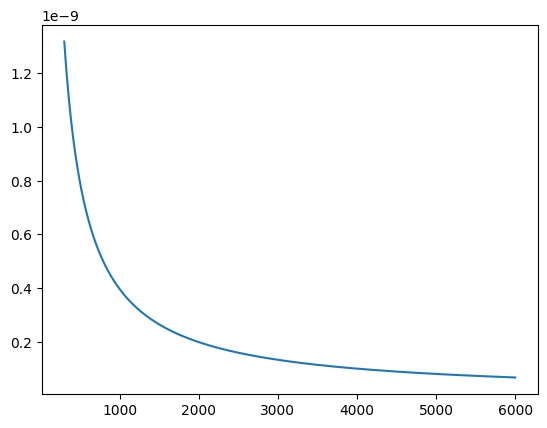

In [6]:
wavelength = h / (m_n *v)
plt.plot(v, wavelength)

Original pdf
$$\int f_v dv = 1$$
Todo: find $f_\lambda$ such that
$$\int f_\lambda d\lambda = 1$$
With $\lambda = \frac{h}{m_n v}$
$$\implies d\lambda = \frac{-h}{m_n v ^ 2}dv$$
$$\implies dv = \frac{-m_n v ^ 2}{h}d\lambda$$

In practice, reordering the bounds of the integral will cancel the $-1$ factor.


[1.31867800e-09 1.31617702e-09 1.31368550e-09 ... 6.59464313e-11
 6.59401651e-11 6.59339002e-11]


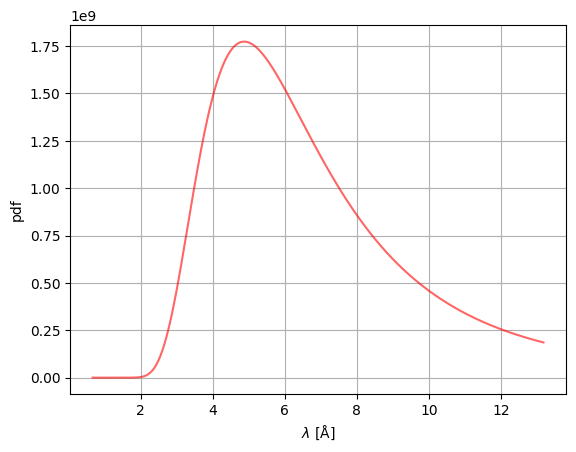

In [7]:
print(wavelength)
f_v_to_f_wave = m_n * v**2 / h 
f_v_to_f_wave = h / (m_n * wavelength ** 2)
pdf_wave = pdf_v * f_v_to_f_wave
plt.plot(wavelength * 1e10, pdf_wave, 'r',alpha=0.6,label='maxwell pdf')
# plt.ylim(0,0.0004)
plt.xlabel(r'$\lambda$ [Å]')
plt.ylabel('pdf')
plt.grid()

In [8]:
np.sum(pdf_wave * 1e-10)

217.20283084269442

# Direct computation using transformed Maxwell-Boltzmann

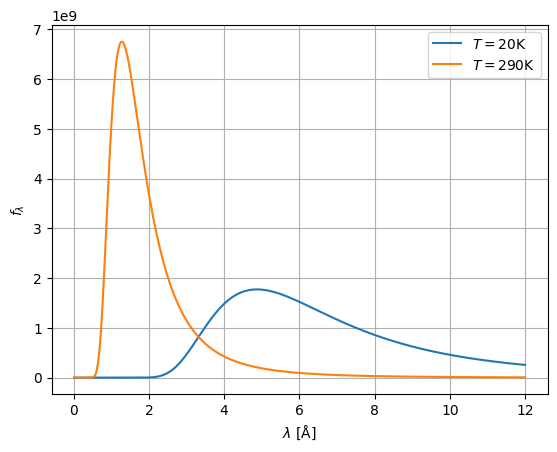

In [9]:
def comp_pdf_wave(wavelength, T):
    a = np.sqrt(k_b * T / m_n)
    return maxwell.pdf(h / (m_n * wavelength), scale=a) * h / (m_n * wavelength ** 2)

w_0 = 2.165e-10
w_1 = 4e-10
w_2 = 8e-10
T = 20
center_1 = comp_pdf_wave(w_1,T)
center_2 = comp_pdf_wave(w_2,T)
center_1/center_2

wavelength = np.linspace(0.01e-10, 12e-10, 10000) # m
d_wavelength = wavelength[1] - wavelength[0]
v = h / (m_n * wavelength)
# T is in Kelvin
for T in [20,290]:
    a = np.sqrt(k_b * T / m_n)
    pdf_wave = comp_pdf_wave(wavelength, T)
    plt.plot(wavelength * 1e10, pdf_wave,label=r'$T=' +str(T)+r'$K')
    # plt.ylim(0,0.0004)
    plt.xlabel(r'$\lambda$ [Å]')
    plt.ylabel(r'$f_\lambda$')
# for w in [w_0, w_1, w_2]:
#     plt.axvline(w * 1e10, linestyle='--')
plt.grid()
plt.legend()

# Monochromators
$\lambda = 8 Å$ means a helical slot velocity selector rotating at a set velocity.
$\lambda = 4 Å$ means a pyroletic graphite crystal rotated to the correct angle.

[FWHM](https://en.wikipedia.org/wiki/Full_width_at_half_maximum) is a common term when expressing $\Delta\lambda/\lambda$, and the relation to a Gauss is through $\Delta\lambda = 2 \sqrt{2\ln2} \sigma$

For the helical slot velocity selector  $\Delta\lambda \approx 0.1\lambda$, for the PG crystal $\Delta\lambda \approx 0.01\lambda$ 

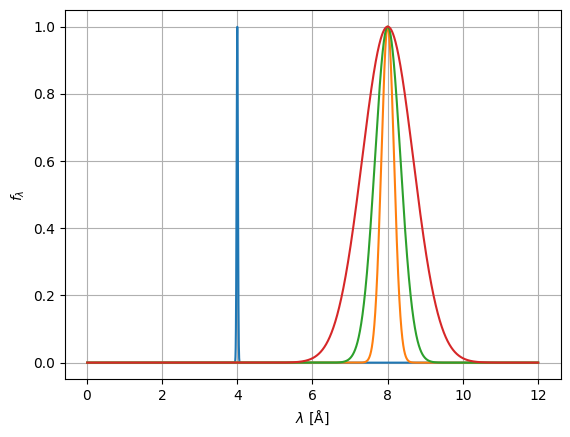

In [9]:
def filter(wavelengths, center_wavelength, delta_wavelength):
    sigma = delta_wavelength / (2 * np.sqrt(2 * np.log(2)))
    return np.exp(-(wavelengths - center_wavelength) ** 2 / (2 * sigma**2))
monochrom_options = [(w_1,0.01), (w_2, 0.05), (w_2, 0.1), (w_2, 0.2)]
monochrom_transfer = np.zeros((4, len(wavelength)))

for (i,(w_0, f)) in enumerate(monochrom_options):
    monochrom_transfer[i] = filter(wavelength, w_0, f * w_0)

for transfer in monochrom_transfer:
    plt.plot(wavelength * 1e10, transfer)  
plt.xlabel(r'$\lambda$ [Å]')
plt.ylabel(r'$f_\lambda$')
plt.grid()

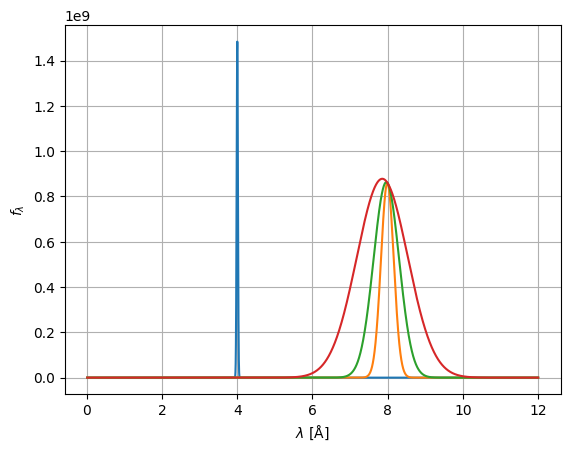

In [10]:
T = 20
pdf_wave = comp_pdf_wave(wavelength, T)
selected = pdf_wave * monochrom_transfer
for selected_i in selected:
    plt.plot(wavelength * 1e10, selected_i)
plt.xlabel(r'$\lambda$ [Å]')
plt.ylabel(r'$f_\lambda$')
plt.grid()

In [11]:
from scipy import integrate
flux_fraction = integrate.trapezoid(selected, axis=1) * d_wavelength
print(flux_fraction)
flux_fraction[2]/flux_fraction[0]

[0.00631826 0.03658985 0.07346646 0.14911477]


11.6276433093639